In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My\ Drive/BTP/ImageQuilting

/content/drive/My Drive/BTP/ImageQuilting


In [2]:
import numpy as np
import numpy
import cv2
from matplotlib import pyplot as plt
import matplotlib
from math import pi, log
matplotlib.rcParams['figure.figsize'] = [5, 5]

In [10]:

texture = plt.imread('relevant_patches/patch_1.jpeg')[:127,:127]


# In[72]:


def initialise(imagergb):
    noiseRGB = np.random.random_integers(0,255,imagergb.shape)
    for t in range(3):
        image = imagergb[:,:,t]
        noise=np.random.random_integers(0,255,image.shape)
        values = np.zeros((256,))
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                values[image[i,j]]=values[image[i,j]]+1
        for i in range(1,256):
            values[i]=values[i]+values[i-1]
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                # print(noise[i,j]*values[noise[i,j]]/(image.shape[0]*image.shape[1]))
                noise[i,j]=int(noise[i,j]*values[noise[i,j]]/(image.shape[0]*image.shape[1]))
        noiseRGB[:,:,t]=noise
    return noiseRGB

# initialise(texture)


# In[73]:

In [ ]:


def reduce_image(array):
    
    ## Assume a square image with size as a power of 2 
    size = array.shape[0]
    
    negative_one = np.reshape(2*array[0,:] - array[1,:],(1,size))
    negative_two = np.reshape(2*array[0,:] - array[2,:],(1, size))
    
    padded_array = numpy.vstack((negative_one, array))
    padded_array = numpy.vstack((negative_two, padded_array))
    
    positive_one = np.reshape(2*array[size-1, :] - array[size-2, :],(1, size))
    positive_two = np.reshape(2*array[size-1, :] - array[size-3, :],(1, size))
    
    padded_array = numpy.vstack((padded_array, positive_one))
    padded_array = numpy.vstack((padded_array, positive_two))

    negative_one = np.reshape(2*padded_array[:,0] - padded_array[:,1],(size+4,1))
    negative_two = np.reshape(2*padded_array[:,0] - padded_array[:,2],(size+4,1))
    
    padded_array = numpy.hstack((negative_one, padded_array))
    padded_array = numpy.hstack((negative_two, padded_array))
    
    positive_one = np.reshape(2*padded_array[:, size+1] - padded_array[:, size],(size+4,1))
    positive_two = np.reshape(2*padded_array[:, size+1] - padded_array[:, size-1],(size+4,1))
    
    padded_array = numpy.hstack((padded_array, positive_one))
    padded_array = numpy.hstack((padded_array, positive_two))
    

    new_array = np.zeros((size+4,size))
    
    G = np.array([1,5,8,5,1])*1.0/20
    for i in range(size+4):
        
        for j in range(size):
        
            sub_matrix = padded_array[i,j:j+5]
            new_array[i,j]=np.sum(np.multiply(sub_matrix,G.T))
    reduce_image= np.zeros((size,size))
    for j in range(size):
        
        for i in range(size):
        
            sub_matrix = new_array[i:i+5,j]
            reduce_image[i,j]=np.sum(np.multiply(sub_matrix,G))
    reduce_image=reduce_image[::2,::2]
    reduce_image = numpy.clip(reduce_image, 0, 255)
    reduce_image = reduce_image.astype(numpy.uint8)
           
    return reduce_image


# In[5]:


def expand(array):
#     if(len(array.shape)==2):
#         array=np.reshape(array,(array.shape[0],array.shape[1],1))
    new_array=np.zeros(np.multiply(array.shape,2),dtype=np.uint8)
    new_array[::2,::2,...]=array
    G = 1.0 / 10 * np.array([1, 5, 8, 5, 1])
#     G = 0 * np.array([1, 5, 8, 5, 1])
    
    array=np.copy(new_array)
    size = array.shape[0]
#     channels=array.shape[2]
#     negative_one = np.reshape(2*array[0,:,:] - array[1,:,:],(1,size,channels))
#     negative_two = np.reshape(2*array[0,:,:] - array[2,:,:],(1, size,channels))
    negative_one = np.reshape(2*array[0,:] - array[1,:],(1,size))
    negative_two = np.reshape(2*array[0,:] - array[2,:],(1, size))
    
    padded_array = numpy.vstack((negative_one, array))
    padded_array = numpy.vstack((negative_two, padded_array))
    
#     positive_one = np.reshape(2*array[size-1, :] - array[size-2, :],(1,size,channels))
#     positive_two = np.reshape(2*array[size-1, :] - array[size-3, :],(1,size,channels))
    positive_one = np.reshape(2*array[size-1] - array[size-1],(1,size))
    positive_two = np.reshape(2*array[size-1] - array[size-3],(1,size))
    
    padded_array = numpy.vstack((padded_array, positive_one))
    padded_array = numpy.vstack((padded_array, positive_two))

#     negative_one = np.reshape(2*padded_array[:,0,:] - padded_array[:,1,:],(size+4,1,channels))
#     negative_two = np.reshape(2*padded_array[:,0,:] - padded_array[:,2,:],(size+4,1,channels))
    negative_one = np.reshape(2*padded_array[:,0] - padded_array[:,1],(size+4,1))
    negative_two = np.reshape(2*padded_array[:,0] - padded_array[:,2],(size+4,1))
    
    padded_array = numpy.hstack((negative_one, padded_array))
    padded_array = numpy.hstack((negative_two, padded_array))
    
#     positive_one = np.reshape(2*padded_array[:, size+1,:] - padded_array[:, size,:],(size+4,1,channels))
#     positive_two = np.reshape(2*padded_array[:, size+1,:] - padded_array[:, size-1,:],(size+4,1,channels))
    positive_one = np.reshape(2*padded_array[:, size+1] - padded_array[:, size],(size+4,1))
    positive_two = np.reshape(2*padded_array[:, size+1] - padded_array[:, size-1],(size+4,1))
    
    padded_array = numpy.hstack((padded_array, positive_one))
    padded_array = numpy.hstack((padded_array, positive_two))
    
    
    ########################################
    new_array = np.zeros((size+4,size))
    for i in range(size+4):
        for j in range(size):
            sub_matrix = padded_array[i,j:j+5]
#             print(np.sum(np.multiply(sub_matrix,G)))
            new_array[i,j]=np.sum(np.multiply(sub_matrix,G))
    expanded_image= np.zeros((size,size))  
    for j in range(size):
        
        for i in range(size):
        
            sub_matrix = new_array[i:i+5,j]
            expanded_image[i,j]=np.sum(np.multiply(sub_matrix,G))
            
    expanded_image = numpy.clip(expanded_image, 0, 255)
    expanded_image = expanded_image.astype(numpy.uint8)
         
    return expanded_image

def Gpyramid(img,layers=7):
    
    size=img.shape[0]
    gaussian_pyramid = []
    gaussian_pyramid.append(img)
    new_array=img
    
    for _ in range(layers-1):
        new_array = reduce_image(new_array)
        gaussian_pyramid.append(new_array)
    gaussian_pyramid.reverse()
    return gaussian_pyramid

def Lpyramid(img,depth=7):
    pyramid=Gpyramid(img,depth)   #taking a=0.4
    laplacian_pyramid = []
    
    for i in range(len(pyramid)-1):
        next_level=expand(pyramid[i+1])
        l_image=pyramid[i]-next_level
        laplacian_pyramid.append(l_image)
    laplacian_pyramid.append(pyramid[-1])
    laplacian_pyramid.reverse()
    return laplacian_pyramid


# In[77]:


def findBest(gp1,gp2,k,pos,level):
    image=np.copy(gp2[level])
    bestVal=0
    bestDiff=100000000
    for i in range(k-1,image.shape[0]):
        for j in range(k-1,image.shape[1]):
            diff = 0
            for d in range(level+1):
                s=int(k/pow(2,level-d))
                m=int(i/pow(2,level-d))
                n=int(j/pow(2,level-d))
                mp=int(pos[0]/pow(2,level-d))
                n2=int(pos[1]/pow(2,level-d))
                tgt_nbd = np.copy(gp1[d][max(mp-s+1,0):mp+1,max(n2-s+1,0):n2+1])
                curr_nbd = np.copy(gp2[d][m-min(s,mp+1)+1:m+1,n-min(s,n2+1)+1:n+1])              
                if pos[0]>0 and pos[1]>0:
                    tgt_nbd[-1,-1] =0
                    curr_nbd[-1, -1] = 0
#                 else:
#                     if pos[0]>0:
#                         tgt_nbd[0,:]=0
#                         curr_nbd[-1, -1] = 0
                diff=diff+np.linalg.norm(curr_nbd-tgt_nbd,'fro')
            
            if(diff<bestDiff):
                bestDiff=diff
                bestVal = image[i,j]
    return bestVal


# In[81]:


def build(imag,base,nbd_size):
    GP1 = Gpyramid(imag,layers=1)
    GP_sample = Gpyramid(base, layers=1)
    for d in range(1):
        k=int(nbd_size/pow(2,1-d))
        if(k<1):
            continue
        copy = np.flip(GP_sample[d][0:k,:],axis=0)
        GP_sample[d] = np.vstack((copy,GP_sample[d]))
        copy_left = np.flip(GP_sample[d][:,0:k],axis=1)
        GP_sample[d] = np.hstack((copy_left,GP_sample[d]))
    for d in range(1):
        print('level', d)
        k=nbd_size
#         GP1[d][0:nbd_size,:]=GP_sample[d][0:nbd_size,:]
#         GP1[d][:,0:nbd_size]=GP_sample[d][:,0:nbd_size]
        im = np.copy(GP1[d])
#         plt.imshow(GP1[-1], 'gray'),plt.show()
        for i in range(im.shape[0]):
            for j in range(im.shape[1]):
                if i>0 or j > 0:
                    k=int(nbd_size/pow(2,d))
                    im[i,j]=findBest(GP1,GP_sample,k,[i,j],d)
                    GP1[d]=np.copy(im)
#             if(d==1):
#                 plt.imshow(GP1[-1], 'gray'),plt.show()
                    
                    
#                 else:
    return GP1[-1]

(640, 640)

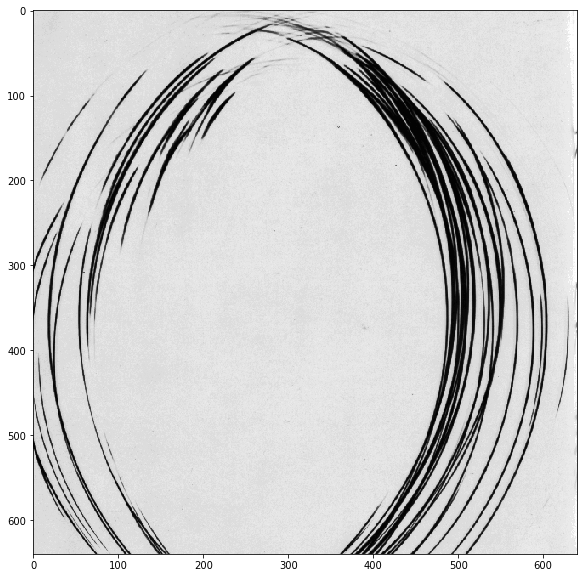

(<matplotlib.image.AxesImage at 0x7fa74075db50>, None)

In [ ]:
newI=build(initialise(texture),texture,15)


In [ ]:
cv2.imwrite()

TypeError: imwrite() missing required argument 'filename' (pos 1)

In [ ]:
f = np.fft.fft2(img)
F = np.fft.fftshift(f)

In [ ]:
noise = np.append(np.random.uniform(-pi,pi,(320,640)),np.zeros((320,640)),axis=0)

In [ ]:
noise[320:640,0:320]=-1*np.flip(np.flip(noise[0:320,320:640],axis=0),axis=1)
noise[320:640,320:640]=-1*np.flip(np.flip(noise[0:320,0:320],axis=0),axis=1)

In [ ]:
noise[0,639],noise[320,639],noise[0,320],noise[320,320] = np.random.random_integers(0,1,4)*pi

/home/ashish/miniconda3/envs/COL783/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  """Entry point for launching an IPython kernel.


In [ ]:
# Fnew=np.multiply(np.abs(F),np.exp((0+1j)*noise))
Fnew=np.multiply(F,np.exp((0+1j)*noise))

In [ ]:
Fishift = np.fft.ifftshift(Fnew)
fnew = (np.fft.ifft2(Fishift))

/home/ashish/miniconda3/envs/COL783/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


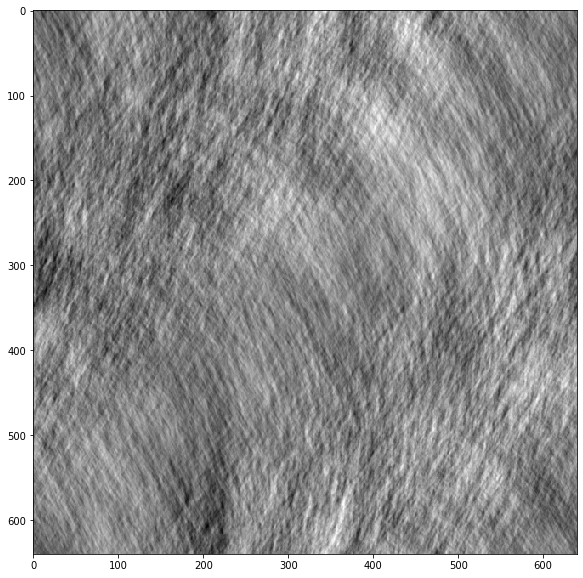

(<matplotlib.image.AxesImage at 0x7fa7406cf150>, None)

In [ ]:
plt.imshow(fnew.astype(float), 'gray'),plt.show()

In [ ]:
cv2.imwrite('part1(55).jpg',fnew)

TypeError: Expected Ptr<cv::UMat> for argument '%s'

In [ ]:
cv2.imwrite('part1(55).jpg',fnew.astype(np.uint8))

/home/ashish/miniconda3/envs/COL783/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


True